In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler


## Loading the final preprocessed dataset


In [2]:
full_cleaned_final=pd.read_csv('full_cleaned_final.csv')
full_cleaned_final

,Unnamed: 0,scale__biofuel_electricity,scale__hydro_electricity,scale__solar_electricity,scale__wind_electricity,scale__coal_electricity,scale__fossil_electricity,scale__gas_production,scale__greenhouse_gas_emissions,scale__low_carbon_electricity,scale__net_elec_imports,scale__nuclear_electricity,scale__oil_production,remainder__country,remainder__year,remainder__iso_code,remainder__GDP_per_capita
0,2173,-0.235608,-0.178775,-0.114166,-0.139167,-0.149637,-0.207758,-0.242276,-0.192084,-0.218176,0.014103,-0.196458,-0.228896,Cameroon,2000,CMR,1137.624523
1,2203,-0.191263,0.135897,-0.114166,-0.137506,-0.144183,-0.068775,0.278992,-0.098054,-0.023312,0.150959,-0.113018,0.289962,Argentina,2000,ARG,10672.722035
2,1545,-0.226995,1.837108,-0.114166,-0.139167,0.388650,1.302087,7.452639,0.993620,1.535788,-1.562116,1.509430,4.324612,Russia,2000,RUS,5323.662598
3,2199,-0.235608,-0.221558,-0.114166,-0.139167,-0.149637,-0.207786,-0.242276,-0.192403,-0.239290,0.014103,-0.196458,-0.294758,Guinea-Bissau,2000,GNB,563.624309
4,906,-0.214674,0.165884,-0.114166,-0.137922,-0.028456,0.049415,-0.232526,0.022664,-0.046346,0.389914,-0.196458,-0.253664,Turkey,2000,TUR,6454.593119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3343,856,0.743929,-0.221308,0.066370,0.649338,-0.137886,-0.192625,-0.242276,-0.170429,-0.060340,0.211539,-0.196458,-0.294758,Denmark,2022,DNK,56386.120691
3344,2052,0.975571,-0.220681,1.459014,0.715117,-0.098379,-0.017660,-0.242276,-0.037908,0.082511,-0.464941,-0.138092,-0.294758,Netherlands,2022,NLD,47301.904915
3345,728,1.488140,-0.045654,-0.086957,0.326691,-0.139996,-0.186495,-0.242276,-0.158732,0.160469,1.425388,0.152631,-0.294758,Finland,2022,FIN,45361.232992
3346,1954,0.604697,0.014319,2.858916,2.435765,-0.124901,0.085231,-0.242276,0.026952,0.867045,-2.202697,0.617481,-0.294758,Spain,2022,ESP,26748.793053


In [3]:
full_cleaned_final1 = full_cleaned_final[[ 'scale__biofuel_electricity', 'scale__hydro_electricity',
       'scale__solar_electricity', 'scale__wind_electricity',
       'scale__coal_electricity', 'scale__fossil_electricity',
       'scale__gas_production', 'scale__greenhouse_gas_emissions',
       'scale__low_carbon_electricity', 'scale__net_elec_imports',
       'scale__nuclear_electricity', 'scale__oil_production'
       ,'remainder__GDP_per_capita']]


In [4]:
full_cleaned_final1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3348 entries, 0 to 3347
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   scale__biofuel_electricity       3348 non-null   float64
 1   scale__hydro_electricity         3348 non-null   float64
 2   scale__solar_electricity         3348 non-null   float64
 3   scale__wind_electricity          3348 non-null   float64
 4   scale__coal_electricity          3348 non-null   float64
 5   scale__fossil_electricity        3348 non-null   float64
 6   scale__gas_production            3348 non-null   float64
 7   scale__greenhouse_gas_emissions  3348 non-null   float64
 8   scale__low_carbon_electricity    3348 non-null   float64
 9   scale__net_elec_imports          3348 non-null   float64
 10  scale__nuclear_electricity       3348 non-null   float64
 11  scale__oil_production            3348 non-null   float64
 12  remainder__GDP_per_c

In [5]:
full_cleaned_final1['remainder__GDP_per_capita']

0        1137.624523
1       10672.722035
2        5323.662598
3         563.624309
4        6454.593119
            ...     
3343    56386.120691
3344    47301.904915
3345    45361.232992
3346    26748.793053
3347    20575.123491
Name: remainder__GDP_per_capita, Length: 3348, dtype: float64

In [6]:
full_cleaned_final.columns

Index(['Unnamed: 0', 'scale__biofuel_electricity', 'scale__hydro_electricity',
       'scale__solar_electricity', 'scale__wind_electricity',
       'scale__coal_electricity', 'scale__fossil_electricity',
       'scale__gas_production', 'scale__greenhouse_gas_emissions',
       'scale__low_carbon_electricity', 'scale__net_elec_imports',
       'scale__nuclear_electricity', 'scale__oil_production',
       'remainder__country', 'remainder__year', 'remainder__iso_code',
       'remainder__GDP_per_capita'],
      dtype='object')

## Statistical inference

### Impact of Biofuel in GDP_Per_capita

In [7]:
model1 = smf.ols(formula = 'remainder__GDP_per_capita ~ scale__biofuel_electricity', data=full_cleaned_final1).fit()

print(model1.params)

Intercept                     13695.008547
scale__biofuel_electricity     3711.928630
dtype: float64


In [8]:
# Checking the R-sqaured
model1.rsquared

0.0390978955237834

In [9]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     remainder__GDP_per_capita   R-squared:                       0.039
Model:                                   OLS   Adj. R-squared:                  0.039
Method:                        Least Squares   F-statistic:                     136.1
Date:                       Thu, 08 Jun 2023   Prob (F-statistic):           7.29e-31
Time:                               16:57:06   Log-Likelihood:                -37629.
No. Observations:                       3348   AIC:                         7.526e+04
Df Residuals:                           3346   BIC:                         7.527e+04
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    1.37e+04    318.126     43.049      0.000    1.31e+04    1.43e+04
scale__biofuel_electricity  3711.9286    318.126     11.668      0.000    3088.187    4335.670
==============================================================================
Omnibus:                     1471.421   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6866.555
Skew:                           2.127   Prob(JB):                         0.00
Kurtosis:                       8.579   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
model_oil = smf.ols(formula = 'remainder__GDP_per_capita ~ scale__oil_production', data=full_cleaned_final1).fit()

print(model_oil.params)
model_oil.rsquared

Intercept                13695.008547
scale__oil_production     2496.822658
dtype: float64


0.01769006956057384

###  Net imports

In [11]:
model_elec_imports = smf.ols(formula = 'remainder__GDP_per_capita ~ scale__net_elec_imports', data=full_cleaned_final1).fit()

print(model_elec_imports.params)
model_elec_imports.rsquared


Intercept                  13695.008547
scale__net_elec_imports      468.729796
dtype: float64


0.0006234466133160366

### Fossil

In [12]:
scale__fossil_electricity = smf.ols(formula = 'remainder__GDP_per_capita ~ scale__fossil_electricity', data=full_cleaned_final1).fit()

print(scale__fossil_electricity.params)
scale__fossil_electricity.rsquared

Intercept                    13695.008547
scale__fossil_electricity     1841.430855
dtype: float64


0.009621991721835088

### Gas production

In [13]:
scale__gas_production = smf.ols(formula = 'remainder__GDP_per_capita ~ scale__gas_production', data=full_cleaned_final1).fit()

print(scale__gas_production.params)
scale__gas_production.rsquared


Intercept                13695.008547
scale__gas_production     3246.948527
dtype: float64


0.029916098521096446

### Impact of hydro_electricity on GDP

In [14]:
model2 = smf.ols(formula = 'remainder__GDP_per_capita ~ scale__hydro_electricity', data=full_cleaned_final).fit()

print(model2.params)

Intercept                   13695.008547
scale__hydro_electricity     1802.635707
dtype: float64


In [15]:
model2.rsquared

0.00922083149812769

In [16]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     remainder__GDP_per_capita   R-squared:                       0.009
Model:                                   OLS   Adj. R-squared:                  0.009
Method:                        Least Squares   F-statistic:                     31.14
Date:                       Thu, 08 Jun 2023   Prob (F-statistic):           2.59e-08
Time:                               16:57:06   Log-Likelihood:                -37680.
No. Observations:                       3348   AIC:                         7.536e+04
Df Residuals:                           3346   BIC:                         7.538e+04
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  1.37e+04    323.034     42.395      0.000    1.31e+04    1.43e+04
scale__hydro_electricity  1802.6357    323.034      5.580      0.000    1169.271    2436.000
==============================================================================
Omnibus:                     1400.266   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5583.524
Skew:                           2.082   Prob(JB):                         0.00
Kurtosis:                       7.763   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Impact of Solar_electricity on GDP

In [17]:
model3 = smf.ols(formula = 'remainder__GDP_per_capita ~ scale__solar_electricity', data=full_cleaned_final).fit()

print(model3.params)

Intercept                   13695.008547
scale__solar_electricity     1614.230401
dtype: float64


In [18]:
model3.rsquared

0.007394097813170797

In [19]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     remainder__GDP_per_capita   R-squared:                       0.007
Model:                                   OLS   Adj. R-squared:                  0.007
Method:                        Least Squares   F-statistic:                     24.92
Date:                       Thu, 08 Jun 2023   Prob (F-statistic):           6.27e-07
Time:                               16:57:06   Log-Likelihood:                -37683.
No. Observations:                       3348   AIC:                         7.537e+04
Df Residuals:                           3346   BIC:                         7.538e+04
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  1.37e+04    323.332     42.356      0.000    1.31e+04    1.43e+04
scale__solar_electricity  1614.2304    323.332      4.992      0.000     980.282    2248.178
==============================================================================
Omnibus:                     1410.390   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5675.126
Skew:                           2.096   Prob(JB):                         0.00
Kurtosis:                       7.808   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Impact of Wind_electricity on GDP

In [20]:
model4 = smf.ols(formula = 'remainder__GDP_per_capita ~ scale__wind_electricity', data=full_cleaned_final).fit()

print(model4.params)

Intercept                  13695.008547
scale__wind_electricity     2325.753447
dtype: float64


In [21]:
model4.rsquared

0.015349049745716603

In [22]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     remainder__GDP_per_capita   R-squared:                       0.015
Model:                                   OLS   Adj. R-squared:                  0.015
Method:                        Least Squares   F-statistic:                     52.16
Date:                       Thu, 08 Jun 2023   Prob (F-statistic):           6.31e-13
Time:                               16:57:06   Log-Likelihood:                -37670.
No. Observations:                       3348   AIC:                         7.534e+04
Df Residuals:                           3346   BIC:                         7.536e+04
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 1.37e+04    322.034     42.527      0.000    1.31e+04    1.43e+04
scale__wind_electricity  2325.7534    322.034      7.222      0.000    1694.351    2957.156
==============================================================================
Omnibus:                     1416.002   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5865.141
Skew:                           2.090   Prob(JB):                         0.00
Kurtosis:                       7.957   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Impact of biofuel and wind_electricity on GDP

In [23]:
model5 = smf.ols(formula = 'remainder__GDP_per_capita ~ scale__biofuel_electricity + scale__wind_electricity', data=full_cleaned_final).fit()

print(model5.params)

Intercept                     13695.008547
scale__biofuel_electricity     5823.575107
scale__wind_electricity       -2531.661695
dtype: float64


In [24]:
model5.rsquared

0.04463199144447405

## Training an OLS model

In [124]:
X_train = full_cleaned_final[['scale__biofuel_electricity','scale__hydro_electricity','scale__solar_electricity','scale__wind_electricity']]
y_train = full_cleaned_final[['remainder__GDP_per_capita']]

In [125]:
X_train

,scale__biofuel_electricity,scale__hydro_electricity,scale__solar_electricity,scale__wind_electricity
0,-0.235608,-0.178775,-0.114166,-0.139167
1,-0.191263,0.135897,-0.114166,-0.137506
2,-0.226995,1.837108,-0.114166,-0.139167
3,-0.235608,-0.221558,-0.114166,-0.139167
4,-0.214674,0.165884,-0.114166,-0.137922
...,...,...,...,...
3343,0.743929,-0.221308,0.066370,0.649338
3344,0.975571,-0.220681,1.459014,0.715117
3345,1.488140,-0.045654,-0.086957,0.326691
3346,0.604697,0.014319,2.858916,2.435765


### Loading the test set

In [126]:
full_cleaned_final_test = pd.read_csv('full_cleaned_final_test.csv').sort_values('remainder__year', ascending=True)
full_cleaned_final_test

,Unnamed: 0,scale__biofuel_electricity,scale__hydro_electricity,scale__solar_electricity,scale__wind_electricity,scale__coal_electricity,scale__fossil_electricity,scale__gas_production,scale__greenhouse_gas_emissions,scale__low_carbon_electricity,scale__net_elec_imports,scale__nuclear_electricity,scale__oil_production,remainder__country,remainder__year,remainder__iso_code,remainder__GDP_per_capita
744,744,-0.235608,-0.221558,-0.114166,-0.139167,-0.149637,-0.123976,-0.111605,-0.139700,-0.239290,0.014103,-0.196458,1.259242,Kuwait,2000,KWT,31657.763247
106,106,-0.235608,-0.098350,-0.114166,-0.139167,-0.080071,-0.146758,-0.233838,-0.127897,-0.178485,0.351771,-0.196458,-0.281461,Serbia,2000,SRB,3193.259737
504,504,-0.235608,-0.221558,-0.114166,-0.139167,-0.149637,-0.171914,-0.110818,-0.169826,-0.239290,0.014103,-0.196458,-0.259791,Bahrain,2000,BHR,21713.538050
394,394,-0.235608,-0.221558,-0.114166,-0.139167,-0.149637,-0.182325,0.365754,-0.173016,-0.239290,-0.098093,-0.196458,-0.191808,Turkmenistan,2000,TKM,2261.699865
26,26,-0.218370,-0.197093,-0.114166,-0.139167,-0.149637,-0.203229,-0.197538,-0.189284,-0.226349,0.016336,-0.196458,-0.268652,Bolivia,2000,BOL,2017.394606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,685,-0.214674,-0.220555,-0.113268,-0.139167,-0.149637,-0.206819,-0.242276,-0.191375,-0.237681,0.053357,-0.196458,-0.294758,Belize,2021,BLZ,5733.352611
683,683,0.720518,-0.195713,0.611633,0.683476,0.253218,0.183069,-0.242276,0.210759,-0.006593,-0.101459,-0.196458,-0.294758,Poland,2022,POL,14437.213791
128,128,-0.174013,-0.162213,0.486431,0.312952,-0.131913,-0.125771,-0.242276,-0.128571,-0.098669,0.403376,-0.196458,-0.294758,Greece,2022,GRC,18382.157564
510,510,-0.234388,-0.221558,-0.090586,-0.139167,-0.149637,-0.202622,-0.242276,-0.189071,-0.237619,0.085891,-0.196458,-0.294758,Malta,2022,MLT,26988.999838


In [127]:
X_test = full_cleaned_final_test[['scale__biofuel_electricity','scale__hydro_electricity','scale__solar_electricity','scale__wind_electricity']]
y_test = full_cleaned_final_test[['remainder__GDP_per_capita']]

In [128]:
X_test

,scale__biofuel_electricity,scale__hydro_electricity,scale__solar_electricity,scale__wind_electricity
744,-0.235608,-0.221558,-0.114166,-0.139167
106,-0.235608,-0.098350,-0.114166,-0.139167
504,-0.235608,-0.221558,-0.114166,-0.139167
394,-0.235608,-0.221558,-0.114166,-0.139167
26,-0.218370,-0.197093,-0.114166,-0.139167
...,...,...,...,...
685,-0.214674,-0.220555,-0.113268,-0.139167
683,0.720518,-0.195713,0.611633,0.683476
128,-0.174013,-0.162213,0.486431,0.312952
510,-0.234388,-0.221558,-0.090586,-0.139167


In [129]:
y_test


,remainder__GDP_per_capita
744,31657.763247
106,3193.259737
504,21713.538050
394,2261.699865
26,2017.394606
...,...
685,5733.352611
683,14437.213791
128,18382.157564
510,26988.999838


In [130]:
model = sm.OLS(y_train,X_train).fit()

In [131]:
# Your predictions
y_pred = model.predict(X_test)

In [132]:
y_pred=pd.DataFrame(y_pred)
y_pred

,0
744,-955.407821
106,-1147.114714
504,-955.407821
394,-955.407821
26,-881.061065
...,...
685,-823.606594
683,3663.448498
128,-2221.514437
510,-1030.357797


In [133]:
y_test

,remainder__GDP_per_capita
744,31657.763247
106,3193.259737
504,21713.538050
394,2261.699865
26,2017.394606
...,...
685,5733.352611
683,14437.213791
128,18382.157564
510,26988.999838


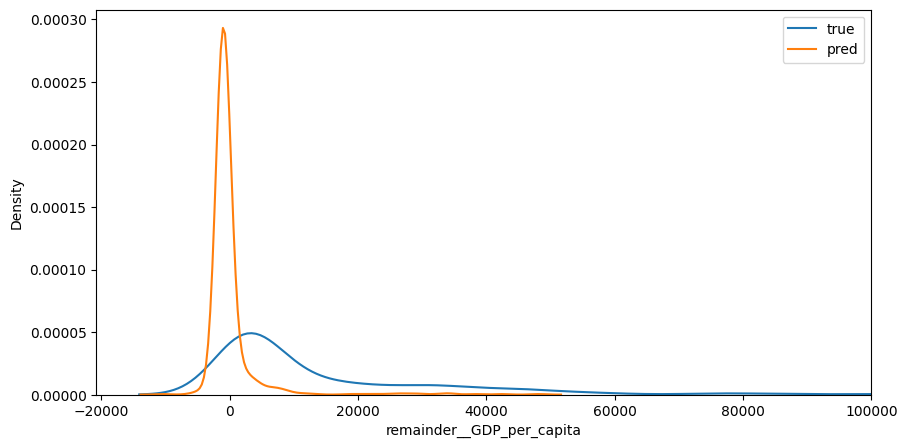

In [134]:
plt.figure(figsize = (10,5))
sns.kdeplot(y_test['remainder__GDP_per_capita'], label = 'true')
sns.kdeplot(y_pred[0], label = 'pred')
plt.xlim(xmax=10e4)
plt.legend()

## Train with a linear regression model

In [135]:
model = LinearRegression()

X_train = full_cleaned_final[['scale__biofuel_electricity','scale__hydro_electricity','scale__solar_electricity','scale__wind_electricity']]
y_train = full_cleaned_final[['remainder__GDP_per_capita']]

# Train the model on the data
model.fit(X_train, y_train)

LinearRegression()

In [136]:
model.score(X_test,y_test)

0.04599587650470627

In [161]:
from sklearn.preprocessing import PolynomialFeatures
Poly_model = PolynomialFeatures(degree=3)
X_poly = Poly_model.fit_transform(X_train)
model = LinearRegression()
model.fit(X_poly,y_train)


LinearRegression()

In [162]:
y_pred = model.predict(X_poly)

In [163]:
from sklearn.metrics import r2_score
r2_score(y_train,y_pred)


0.14159036349727994

In [164]:
X_test_poly = Poly_model.transform(X_test)

In [165]:
y_test_pred = model.predict(X_test_poly)
r2_score(y_test,y_test_pred)

0.1279389677945486

In [166]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [167]:
vif = pd.DataFrame()
vif["variables"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# Print the VIF scores
print(vif)

                    variables       VIF
0  scale__biofuel_electricity  3.658673
1    scale__hydro_electricity  2.276375
2    scale__solar_electricity  5.924429
3     scale__wind_electricity  8.687902


## Same process with the base model

In [ ]:
full_cleaned_base=pd.read_csv('full_cleaned_final.csv')

In [ ]:
modelb1 = smf.ols(formula = 'remainder__GDP_per_capita ~ scale__biofuel_electricity', data=full_cleaned_base).fit()

print(modelb1.params)

In [ ]:
modelb2 = smf.ols(formula = 'remainder__GDP_per_capita ~ scale__hydro_electricity', data=full_cleaned_base).fit()

print(modelb2.params)